# Experiment on Binary AlphaDigit (RBM)

In [1]:
# Import.
import os

import numpy as np

from models.rbm import RBM
from utils import (
    load_alphadigit,
    read_alpha_digit,
    plot_characters_alphadigit,
    plot_generated_images
)

In [2]:
DATA_FOLDER = "../data/"
RESULTS_FOLDER = "../results/"
WEIGHTS_FOLDER = os.path.join(RESULTS_FOLDER, "weights")
ALPHA_DIGIT_PATH = os.path.join(DATA_FOLDER, "binaryalphadigs.mat")

for path in [ALPHA_DIGIT_PATH, WEIGHTS_FOLDER]:
    if not os.path.exists(path):
        raise FileNotFoundError(f"The file {path} does not exist.")

SEED = 42

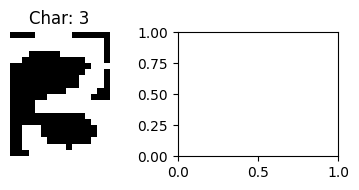

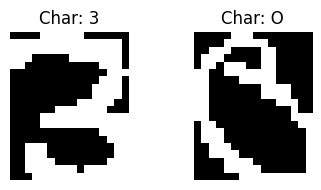

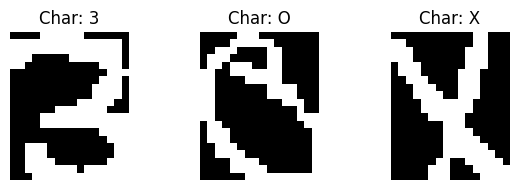

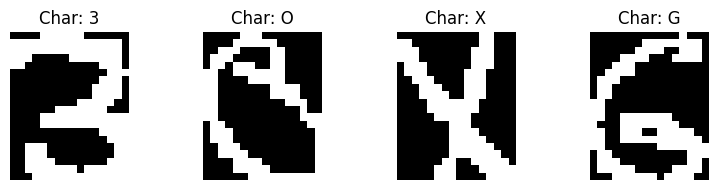

Original data: (36, 39)
Original data (unstack samples -> flatten images): (1365, 320)
Subset (39 characters) data  (39, 320)
Subset (78 characters) data  (78, 320)
Subset (117 characters) data  (117, 320)
Subset (156 characters) data  (156, 320)


In [3]:
alphadigit = load_alphadigit(ALPHA_DIGIT_PATH)

chars_1 = [3]
chars_2 = chars_1 + ["O"]
chars_3 = chars_2 + ["X"]
chars_4 = chars_3 + ["G"]
chars_list = [chars_1, chars_2, chars_3, chars_4]
data_alphas = [
    read_alpha_digit(chars, data=alphadigit, use_data=True) 
    for chars in [chars_1, chars_2, chars_3, chars_4]
]

all_chars = np.arange(0, 35).tolist()
alphadigit_data = read_alpha_digit(all_chars, data=alphadigit, use_data=True) # read all characters

for chars, data_alpha in zip(chars_list, data_alphas):
    plot_characters_alphadigit(chars, data_alpha)

print("Original data:", alphadigit.shape)
print("Original data (unstack samples -> flatten images):", alphadigit_data.shape)
for i, data_alpha in enumerate(data_alphas):
    print(f"Subset ({len(data_alpha)} characters) data ", data_alpha.shape)

RBM(n_visible=320, n_hidden=256)
Epoch 0. Reconstruction error:  0.2011.
Epoch 500. Reconstruction error:  0.0064.
Epoch 1000. Reconstruction error:  0.0016.
Epoch 1500. Reconstruction error:  0.0007.
Epoch 2000. Reconstruction error:  0.0003.
Epoch 2500. Reconstruction error:  0.0002.
Epoch 3000. Reconstruction error:  0.0001.
Epoch 3500. Reconstruction error:  0.0001.
Epoch 4000. Reconstruction error:  0.0001.
Epoch 4500. Reconstruction error:  0.0001.
Epoch 4999. Reconstruction error:  0.0000.


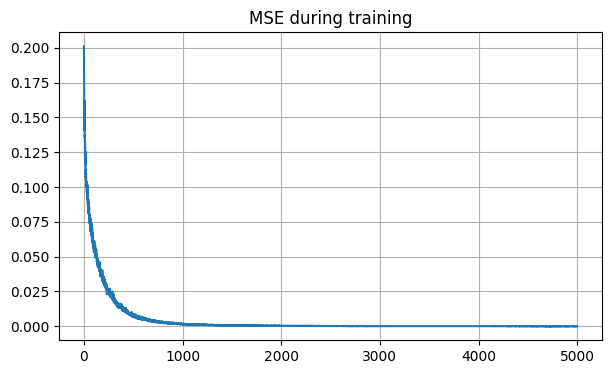

In [4]:
data_alpha = data_alphas[2]
n_chars = data_alpha.shape[0] / 39

# Parameters
n_visible = data_alpha.shape[1]  # Number of visible units (size of each image)
n_hidden = 256  # Number of hidden units (hyperparameter)
learning_rate = 1e-3
n_epochs = 5000
batch_size = 32
# batch_size = int(8 * n_chars)

# Initialize RBM
rbm = RBM(n_visible=n_visible, n_hidden=n_hidden, random_state=SEED)
print(rbm)

# Train RBM
errors_rbm = rbm.train(
    input_data=data_alpha, learning_rate=learning_rate, n_epochs=n_epochs, batch_size=batch_size,
    plot_errors=True, verbose=True
)

In [5]:
# Generate samples
generated_samples = rbm.generate_image(n_samples=20, n_gibbs_steps=2000)

100%|██████████| 2000/2000 [00:00<00:00, 3703.72it/s]


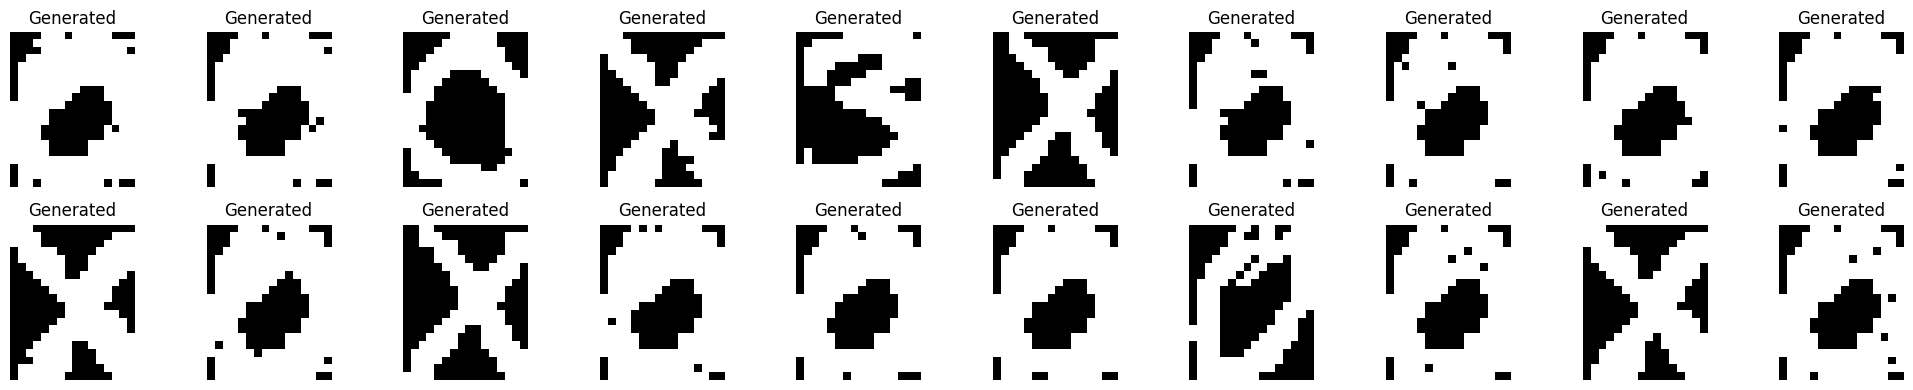

In [6]:
plot_generated_images(generated_samples)